 # **Customer Purchasing Pattern Study Based on Historical Data**
**Contributors**: Qianrong Wen, Ting-Ann Lu, Risheng Guo, 
Luke Hong, Kexi Pi, Yesol Lee (Sally)


**Business Problem**
The main purpose of this project is to find relationships between customers’ characteristics and the amount they spend at a retail store. To meet this goal, we will study customers’ purchasing patterns in various aspects such as marital status, income, education, etc, and create a customer persona.  On top of that, we will evaluate the efficiency of marketing channels from deals to catalog, namely to see which channel would be the most effective to our main customers.

**Data Source**:
This dataset was provided by Dr. Romero-Hernandex, a professor at UC Berkeley and Hult International Business School. We assume that the company, and the actual source of data, requested to be anonymous.
https://www.kaggle.com/jackdaoud/marketing-data

## 1. Loading and Preparing Data



### Overview

In [1]:
# imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/yesol-ba/portfolio/main/marketing_data.csv')

In [3]:
df.shape

(2240, 28)

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


The dataset has **2240 rows and 28 columns**. Columns can be divided into 3 groups. The first group is customer information which includes the year of birth, education, income, etc. The second group is purchase records such as the amount spent on each product category. The third group is marketing-related columns such as the number of purchases by each channel and accepted campaigns.

Column Details:


1. ID: Customer's Unique Identifier
2. Year_Birth: Customer's Birth Year
3. Education: Customer's education level
4. Marital_Status: Customer's marital status
5. Income: Customer's yearly household income
6. Kidhome: Number of children in customer's household
7. Teenhome: Number of teenagers in customer's household
8. Dt_Customer: Date of customer's enrollment with the company
9. Recency: Number of days since customer's last purchase
10. MntWines: Amount spent on wine in the last 2 years
11. MntFruits: Amount spent on fruits in the last 2 years
12. MntMeatProducts: Amount spent on meat in the last 2 years
13. MntFishProducts: Amount spent on fish in the last 2 years
14. MntSweetProducts: Amount spent on sweets in the last 2 years
15. MntGoldProds: Amount spent on gold in the last 2 years
16. NumDealsPurchases: Number of purchases made with a discount
17. NumWebPurchases: Number of purchases made through the company's web site
18. NumCatalogPurchases: Number of purchases made using a catalogue
19. NumStorePurchases: Number of purchases made directly in stores
20. NumWebVisitsMonth: Number of visits to company's web site in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise 
23. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 if customer complained in the last 2 years, 0 otherwise
28. Country: Customer's location

### Data preparation

In [5]:
# check column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

The column income has a empty space in the column name and data type is object. Cleaning this column has two steps


*   clean the column name
*   transform from object to numeric data



In [6]:
# clean column name
df.columns = df.columns.str.replace(' ', '')

In [7]:
# clean data type
# first remove "$"" and ","" from income data
df["Income"] = df["Income"].str.replace("$", "")
df["Income"] = df["Income"].str.replace(",", "")

# transfrom to float
df["Income"] = df["Income"].astype("float")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
# Check missing values

df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [10]:
# There are 24 mssing values in income column. Fill missing values with median
df["Income"] = df["Income"].fillna(df["Income"].median())

In addition, Dt_Customer column is also object and it needs to be transformed as datetime.

In [11]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

Next, we checked outliers to find if there are impossible records. We used boxplots for this step.

In [12]:
# In this step we only used quantitative columns

check_outliers = ["Year_Birth", "Income", "Kidhome", "Teenhome", "Recency", "MntWines", "MntFruits",
                  "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds",
                  "NumCatalogPurchases", "NumDealsPurchases","NumWebPurchases", "NumStorePurchases", "NumWebVisitsMonth"]

print(len(check_outliers))

16


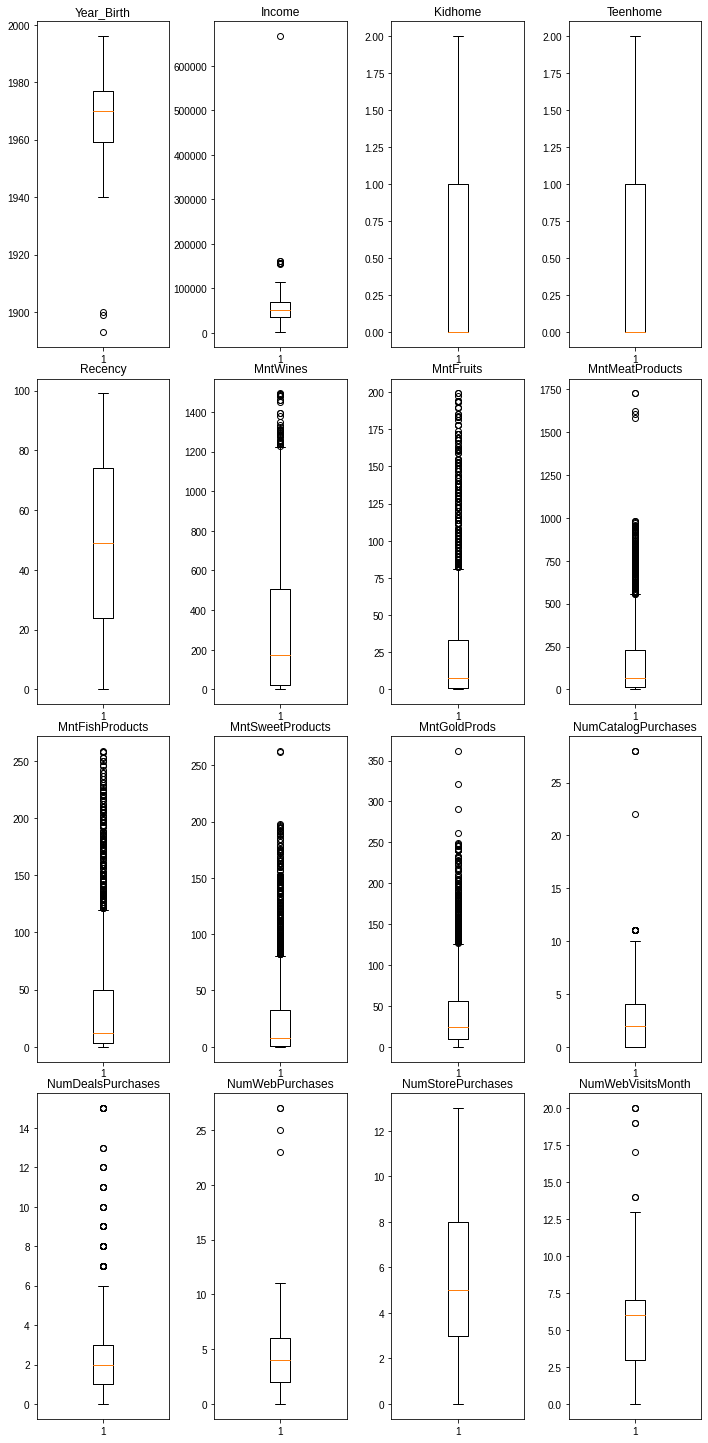

In [13]:
fig, ax = plt.subplots(4, 4, figsize = (10, 20))
plt.tight_layout()


i = 0
j = 0

for col in check_outliers:
  plt.style.use("seaborn-darkgrid")
  ax[i, j].boxplot(df[col])
  ax[i, j].set_title(col)

  j += 1

  if j == 4:
    i += 1
    j = 0

As you can see in the plots, Year_Birth column has data 1900 or under 1900. It is not possible that customers born earlier than 1900 are still alive. Therefore we can drop these 3 rows.

In [14]:
df[df["Year_Birth"] <= 1900]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,SA
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,SP
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,0,1,IND


In [15]:
df = df[df["Year_Birth"] > 1900]
df.shape

(2237, 28)

The rest of columns have outliers but these data are still possible. So no additional procedure is needed.

Then, let's take a look at categorical data. Our team used bar plot this time.

In [16]:
check_cat_data = []
for col in df.columns:
  if col not in check_outliers:
    check_cat_data.append(col)

check_cat_data.remove("ID")
check_cat_data.remove("Dt_Customer")
print(check_cat_data)

['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country']


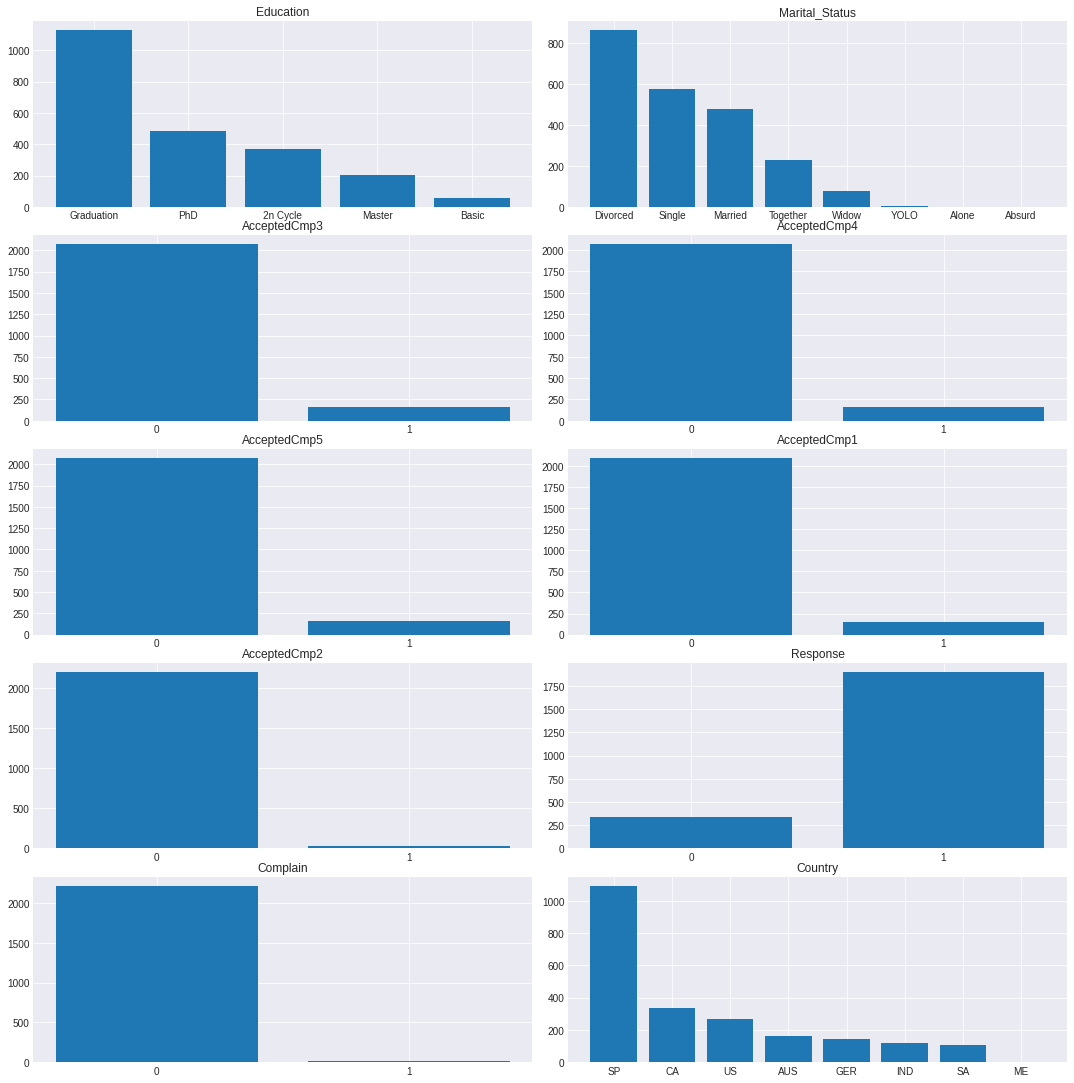

In [17]:
fig, ax = plt.subplots(5, 2, figsize = (15, 15))
plt.tight_layout()


i = 0
j = 0

for col in check_cat_data:
  plt.style.use("seaborn-darkgrid")
  ax[i, j].bar(df[col].unique(), df[col].value_counts(), tick_label=list(df[col].unique()))
  ax[i, j].set_title(col)

  j += 1

  if j == 2:
    i += 1
    j = 0


The Education column and Marital_Status column need some modifications.

Regarding education column, we found '2nd Cycle Education' coresponds with Master's degree in european countries. Therefore, we changed '2nd Cycle' to 'Master'.

In [18]:
# replace 2nd cycle -> master
df.replace(to_replace ="2n Cycle", value ="Master", inplace=True)

<BarContainer object of 4 artists>

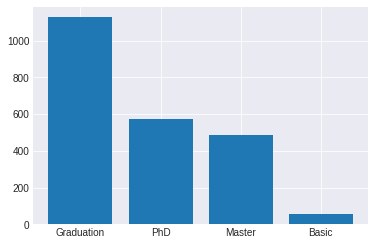

In [19]:
plt.bar(df["Education"].unique(), df["Education"].value_counts())

When we investigated Marital_Status, data values 'YOLO', 'Alone' and 'Absurd' also mean single.

<BarContainer object of 5 artists>

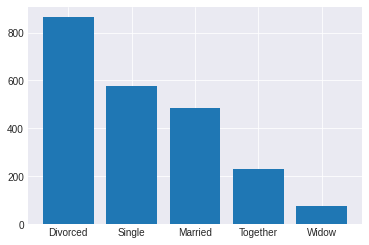

In [20]:
df.replace(to_replace = ["YOLO", "Alone", "Absurd"], value="Single", inplace=True)
plt.bar(df["Marital_Status"].unique(), df["Marital_Status"].value_counts())

Finally we added two new columns called age and total_Mnt

In [21]:
df["Age"] = 2020 - df['Year_Birth']
df["Total_Mnt"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df['Children'] = df['Kidhome'] + df['Teenhome']

In [22]:
df.shape

(2237, 31)

**Note:**
Before we start the EDA, we had to develop the logic to interpret columns related to campaigns. The source of this data does not provide information about campaigns, such as channels, promoted product categories, main target of each campaign, etc. Even though this lack of information, we decided to interpret campaign data because marketing campaign is one important method that can affect customers' buying pattern. Therefore, we assumed that each campaigns were held **independently**, conveying different messages each time so the order of campaign would not affect the acceptance rate.

## 2. Exploratory Data Analysis


## 2.1 Categorical Data

In the data set, there are three categorical data, country, education and marital status, except for dummy variables. In this part, we will mainly focus on the country and education. Marital status will be discussed with Kidhome and Teenhome columns as these columns are about family members.

### Country

The company runs a business in several countries. Customer's purchasing pattern can vary by countries. Before we start further analysis, here we first do some additional data preparation.

In [23]:
country_size = df.groupby('Country').size()/df.shape[0]
country_size = country_size.reset_index().sort_values(by = 0,ascending=False)
country_size.rename(columns={0 : 'percent'}, inplace=True)
print(country_size)

  Country   percent
6      SP  0.489048
5      SA  0.150201
1      CA  0.119803
0     AUS  0.071524
3     IND  0.065713
2     GER  0.053643
7      US  0.048726
4      ME  0.001341


In [24]:
df = df[df['Country'] != 'ME']

Amongst 8 countries, ME only has 0.001 out of total data points. We decided to remove Montenegro data points from our country analysis considering there was not enough data for significant comaprative analysis. The bar chart below shows the final count of countries in our dataset.

Text(0.5, 1.0, 'The number of customers by Country')

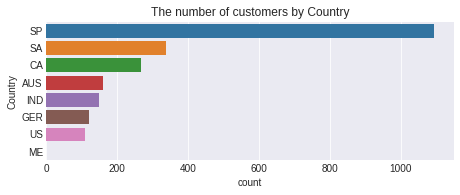

In [25]:
sns.catplot(y="Country", kind="count", data=df, height=2.6, aspect=2.5, order=country_size['Country'])
plt.title('The number of customers by Country')

**Q1. Do descriptive statistics of total amount differ by country? How are they different in each country?**

In [26]:
df.groupby("Country")["Total_Mnt"].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
AUS,160.0,561.018750,566.686879,8.0,62.50,329.5,962.00,2053.0
CA,268.0,628.850746,602.675272,8.0,68.75,458.5,1072.75,2524.0
GER,120.0,624.275000,619.943694,13.0,65.75,443.0,1080.75,2283.0
IND,147.0,540.272109,563.144432,5.0,67.00,292.0,992.00,2009.0
SA,336.0,628.122024,610.049746,6.0,75.50,410.0,1101.00,2525.0
SP,1094.0,603.626143,612.137975,6.0,67.25,367.0,1041.50,2525.0
US,109.0,622.770642,557.862084,19.0,129.00,467.0,972.00,2114.0


Text(0.5, 1.0, 'Total Amount Distribution by Country')

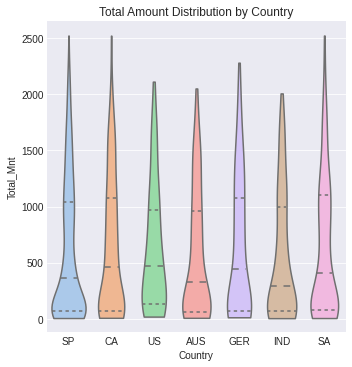

In [27]:
sns.catplot(data=df, x="Country", y="Total_Mnt", kind="violin", inner="quartile", cut=0, palette="pastel")
plt.title("Total Amount Distribution by Country")

A: As you can see in the table Customers from US shows highest total amount spent, but India shows significantly low total amount in terms of median. The violin chart shows that total amount spent in US, AUS and IND are relatively less dispersed than other countries.

**Q2. How is age distributed in each country?**

Text(0.5, 1.0, 'Age Distribution by Country')

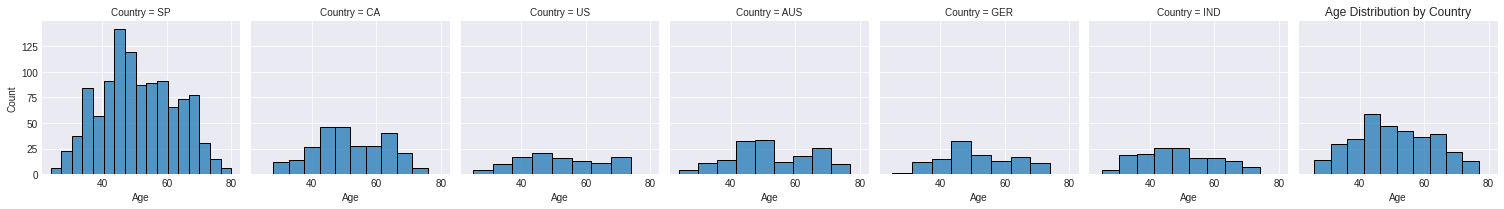

In [28]:
g = sns.FacetGrid(df, col="Country")
g.map(sns.histplot, "Age")
plt.title('Age Distribution by Country')

A: We thought people in different age groups might show different buying behavior or preference of product categories. Therefore we generated histogram of age for each country to check all countries have similar distribution. All countries have the most customer between age of 40 to 50.

**Q3.Does the preference of sales channels differ by country?**

Preferred channel can vary by the nation's infrastructures such as transportation or internet access.To answer this question, we applied aggregate functions to get the variables grouped by country needed.

In [29]:
df2 = df.groupby("Country").agg(
  NumDealsPurchases=pd.NamedAgg(column='NumDealsPurchases', aggfunc='sum'),
  NumWebPurchases=pd.NamedAgg(column='NumWebPurchases', aggfunc='sum'),
  NumCatalogPurchases=pd.NamedAgg(column='NumCatalogPurchases', aggfunc='sum'),
  NumStorePurchases=pd.NamedAgg(column='NumStorePurchases', aggfunc='sum'),
  NumWebVisitsMonth=pd.NamedAgg(column='NumWebVisitsMonth', aggfunc='sum'))
df2 = df2.reset_index()
df2

,Country,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,AUS,362,654,419,879,827
1,CA,644,1154,735,1568,1417
2,GER,258,477,332,721,621
3,IND,364,582,364,783,809
4,SA,814,1396,917,1986,1778
5,SP,2468,4378,2843,6348,5819
6,US,288,484,331,658,610


A: All countries show the most number of purchases via stores in common. We also found that NumWebVisitsMonth is 20% ~ 40% higher than NumWebPurchases. We assume people explore Webstore to browse products then make purchases via different channels, and this trait is observed globally.

**Bar Chart of Relevant Variables by Country**

Text(0.5, 1.0, 'Number of Deals Purchase by Country')

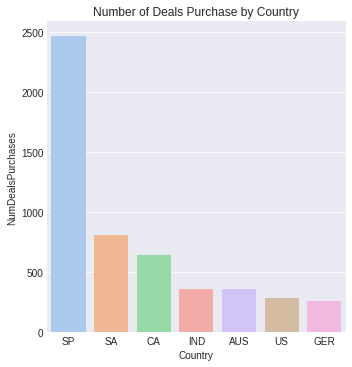

In [30]:
df2 = df2.sort_values(by = 'NumDealsPurchases',ascending=False)
sns.catplot(x = 'Country', y="NumDealsPurchases", kind="bar", palette="pastel", data=df2)
plt.title('Number of Deals Purchase by Country')

Text(0.5, 1.0, 'Number of Web Purchase by Country')

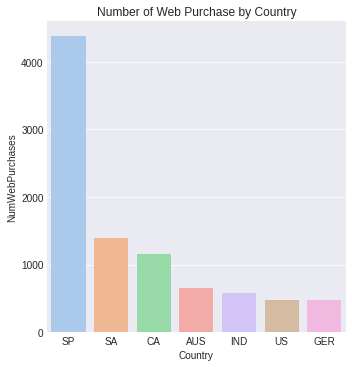

In [31]:
df2 = df2.sort_values(by = 'NumWebPurchases',ascending=False)
sns.catplot(x = 'Country', y="NumWebPurchases", kind="bar", palette="pastel", data=df2)
plt.title('Number of Web Purchase by Country')

We calculated the response rates of the latest marketing campaign to see customers' tendency of using campaigns.



**Q4. Do different countries prefer different product categories?**

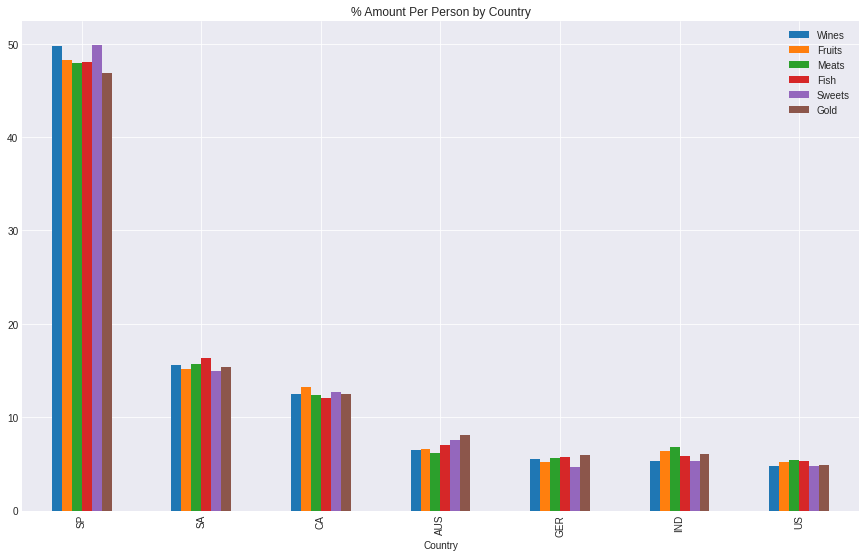

In [32]:
wine = df.groupby(by = ['Country']).sum()['MntWines'].to_frame().rename(columns = {'MntWines' : 'Wines'})
fruit = df.groupby(by = ['Country']).sum()['MntFruits'].to_frame().rename(columns = {'MntFruits' : 'Fruits'})
meat = df.groupby(by = ['Country']).sum()['MntMeatProducts'].to_frame().rename(columns = {'MntMeatProducts' : 'Meats'})
fish = df.groupby(by = ['Country']).sum()['MntFishProducts'].to_frame().rename(columns = {'MntFishProducts' : 'Fish'})
sweet = df.groupby(by = ['Country']).sum()['MntSweetProducts'].to_frame().rename(columns = {'MntSweetProducts' : 'Sweets'})
gold = df.groupby(by = ['Country']).sum()['MntGoldProds'].to_frame().rename(columns = {'MntGoldProds' : 'Gold'})

product_df = pd.concat([wine, fruit, meat, fish, sweet, gold], axis = 1)
product_df =(100 * product_df / product_df.sum()).round(1)
product_df = product_df.sort_values('Wines',ascending=False)
product_df.plot(kind = 'bar', figsize = (15, 9), title = '% Amount Per Person by Country');

A: As indicated by the chart, the product category preference is consistent throughout the countries and there is not change in % of amount spent for each country.

**Q5. How did people react to the latest marketing campaign?**

In [33]:
response_sum = df.groupby(['Country']).agg({'Response': 'sum'})
response_count = df.groupby(['Country']).agg({'Response': 'count'})

response_rate = response_sum / response_count
response_rate = response_rate.reset_index()
response_rate = response_rate.sort_values(by = 'Response',ascending=False)
response_rate

,Country,Response
5,SP,0.160878
4,SA,0.154762
0,AUS,0.143750
1,CA,0.141791
2,GER,0.141667
6,US,0.119266
3,IND,0.088435


Text(0.5, 1.0, 'Reponses Rate for the Latest Campaign by Country')

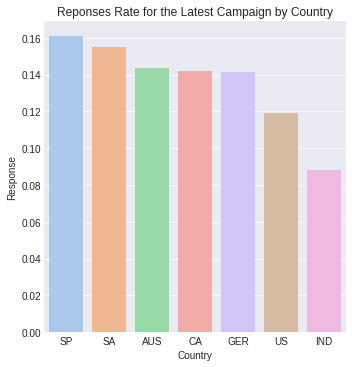

In [34]:
sns.catplot(x = 'Country', y="Response", kind="bar", palette="pastel", data=response_rate)
plt.title('Reponses Rate for the Latest Campaign by Country')

A: As you can see in the table and chart, majority of countries have response rate higher than 0.1. India shows specifically low response rate. We can say that customers generally are sensitive about Sales Campaigns except for Indian customers.

### Education

**Q1. Do more educated customers spend more amount than other education level in average?**

Text(0.5, 1.0, 'Average total amount of spending by Education Level')

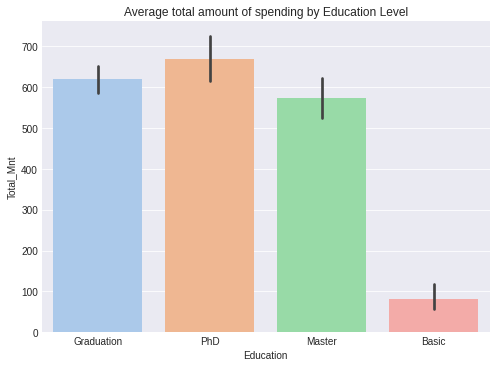

In [35]:
sns.catplot(x='Education',y='Total_Mnt',kind='bar',data=df,height=5.0,aspect=1.4, palette="pastel") 
plt.title("Average total amount of spending by Education Level")

A: In terms of average, customers with Ph.D. degrees spent the most. But people with Master's degrees spent less than Bachelor Degrees. Customers who only finished primary education spent significantly low compared to other education levels.

**Q2. How the total amount distributed by education level?**

Text(0.5, 1.0, 'Distribution of Total Amount by Education Level')

<Figure size 576x576 with 0 Axes>

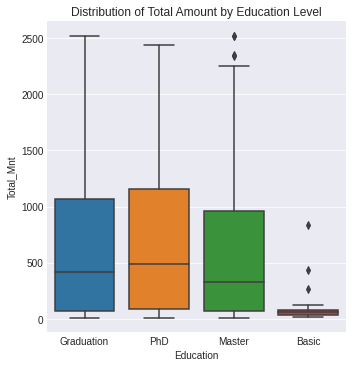

In [36]:
plt.figure(figsize=(8,8))
sns.catplot(kind="box", data=df, x="Education", y="Total_Mnt")
plt.title("Distribution of Total Amount by Education Level")

A: We also looked into total amount distribution by education level. median shows the same pattern as the average of total amount which is Ph.D > Graduation > Master. If you see the basic level, total amount is strongly concentrated in the range between 0 to 100. Even the maximum value in the basic level is smaller than 75th percentile of other groups'. These two analysis made us think that there might be a relationship between education level and income, which probably affects the overall budget of customers.

**Q3. What is the relationship between education level and income? Does higher education really affect income?**

In [37]:
Graduate_df = df.loc[df['Education'] == 'Graduation', 'Income'].to_frame().rename(columns={"Income": "Graduation Income"})
PhD_df = df.loc[df['Education'] == 'PhD', 'Income'].to_frame().rename(columns={"Income": "PhD Income"})
Master_df = df.loc[df['Education'] == 'Master', 'Income'].to_frame().rename(columns={"Income": "Master Income"})
Basic_df = df.loc[df['Education'] == 'Basic', 'Income'].to_frame().rename(columns={"Income": "Basic Income"})

pd.concat([Graduate_df.describe(), PhD_df.describe(), Master_df.describe(), Basic_df.describe()], axis = 1)

,Graduation Income,PhD Income,Master Income,Basic Income
count,1126.000000,484.000000,570.000000,54.000000
mean,52691.490675,56046.813017,51062.905263,20306.259259
std,28046.961400,20515.905367,20901.658144,6235.066773
min,1730.000000,4023.000000,6560.000000,7500.000000
25%,34920.750000,40590.500000,35568.250000,15405.250000
50%,51594.000000,55005.000000,49681.000000,20744.000000
75%,69696.000000,69084.000000,65727.750000,24882.000000
max,666666.000000,162397.000000,157733.000000,34445.000000


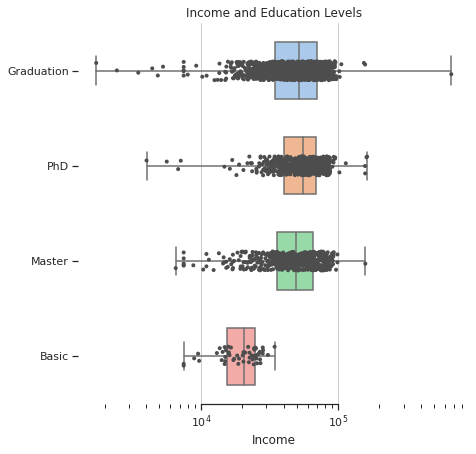

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 7))
ax.set_xscale("log")

planets = sns.load_dataset("planets")

sns.boxplot(x="Income", y="Education", data=df,
            whis=[0, 100], width=.6, palette="pastel")

sns.stripplot(x="Income", y="Education", data=df,
              size=4, color=".3", linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
plt.title('Income and Education Levels');

A: As you can see from the table and box plot, the income of basic education level is significantly low. In terms of median, basic education level has income less than half of other education level. 
We initially thought that the higher education, the higher income. According to data, however, the median of income in Graduation, Masters, and Ph.D. were quite similar. But there were differences in terms of dispersion. Graduation has many outliers both below 1Q and above 3Q, which cause variance to increase.

**Q4. Does the popularity of product categories vary by education level?**

In [39]:
wine = df.groupby(by = ['Education']).sum()['MntWines'].to_frame().rename(columns = {'MntWines' : 'Wines'})
fruit = df.groupby(by = ['Education']).sum()['MntFruits'].to_frame().rename(columns = {'MntFruits' : 'Fruits'})
meat = df.groupby(by = ['Education']).sum()['MntMeatProducts'].to_frame().rename(columns = {'MntMeatProducts' : 'Meats'})
fish = df.groupby(by = ['Education']).sum()['MntFishProducts'].to_frame().rename(columns = {'MntFishProducts' : 'Fish'})
sweet = df.groupby(by = ['Education']).sum()['MntSweetProducts'].to_frame().rename(columns = {'MntSweetProducts' : 'Sweets'})
gold = df.groupby(by = ['Education']).sum()['MntGoldProds'].to_frame().rename(columns = {'MntGoldProds' : 'Gold'})

product_df = pd.concat([wine, fruit, meat, fish, sweet, gold], axis = 1)
display(product_df.transpose())

Education,Basic,Graduation,Master,PhD
Wines,391,319951,162926,195041
Fruits,600,34683,13876,9600
Meats,618,201832,88889,81237
Fish,921,48448,21470,12874
Sweets,654,35287,14735,9755
Gold,1233,57167,24297,15441


In terms of the amount, Graduation, Master, and Ph.D. customers spend the highest amount on wines. These three education levels show the same pattern in product categories. The amount spent for product categories goes in this order: Wines > Meats > Gold > Fish > Sweets > Fruit.

We also computed the amount per person for education level. Since each education levels have a different number of customers, it is hard to compare the amount spent when we aggregate it by sum. So we computed the amount per person to improve readability.

In [40]:
Bas_count = 0
Grad_count = 0
Mas_count = 0
PhD_count = 0

for i in df['Education']:
  if i == 'Basic':
    Bas_count += 1
  elif i == 'Graduation':
    Grad_count += 1
  elif i == 'Master':
    Mas_count += 1
  elif i == 'PhD':
    PhD_count += 1

In [41]:
b_df = (product_df.transpose()['Basic']/Bas_count).to_frame()
g_df = (product_df.transpose()['Graduation']/Grad_count).to_frame()
m_df = (product_df.transpose()['Master']/Mas_count).to_frame()
p_df = (product_df.transpose()['PhD']/PhD_count).to_frame()
productperson_df = pd.concat([b_df, g_df, m_df, p_df], axis = 1)
display(productperson_df)

,Basic,Graduation,Master,PhD
Wines,7.240741,284.148313,285.835088,402.977273
Fruits,11.111111,30.801954,24.343860,19.834711
Meats,11.444444,179.246892,155.945614,167.845041
Fish,17.055556,43.026643,37.666667,26.599174
Sweets,12.111111,31.338366,25.850877,20.154959
Gold,22.833333,50.769982,42.626316,31.902893


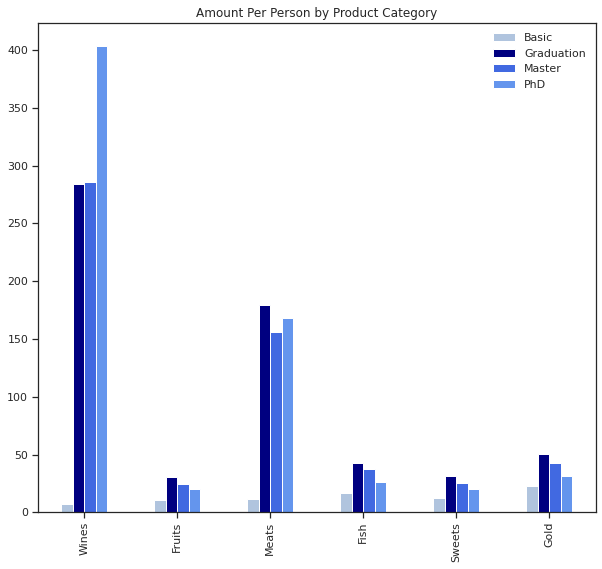

In [42]:
productperson_df.plot(kind = 'bar', color = ['lightsteelblue', 'navy', 'royalblue', 'cornflowerblue'], 
                            figsize = (10, 9), title = 'Amount Per Person by Product Category');

A: When we computed total amount spent per person for each education level, total amount shows the same patterns with the income. Ph.D. which has the highest income in average also shows the highest total amount.

**Q5. Do different education levels prefer different sales channels?**

In [43]:
Deals = df.groupby(by = ['Education']).sum()['NumDealsPurchases'].to_frame().rename(columns = {'NumDealsPurchases' : 'Deals'})
Web = df.groupby(by = ['Education']).sum()['NumWebPurchases'].to_frame().rename(columns = {'NumWebPurchases' : 'Web'})
Catalog = df.groupby(by = ['Education']).sum()['NumCatalogPurchases'].to_frame().rename(columns = {'NumCatalogPurchases' : 'Catalog'})
Store = df.groupby(by = ['Education']).sum()['NumStorePurchases'].to_frame().rename(columns = {'NumStorePurchases' : 'Store'})
Month_Webvisits = df.groupby(by = ['Education']).sum()['NumWebVisitsMonth'].to_frame().rename(columns = {'NumWebVisitsMonth' : 'Month_Webvisits'})

Num_df = pd.concat([Deals, Web, Catalog, Store, Month_Webvisits], axis = 1)

b_person = (Num_df.transpose()['Basic']/Bas_count).to_frame()
g_person = (Num_df.transpose()['Graduation']/Grad_count).to_frame()
m_person = (Num_df.transpose()['Master']/Mas_count).to_frame()
p_person = (Num_df.transpose()['PhD']/PhD_count).to_frame()
Numperson_df = pd.concat([b_person, g_person, m_person, p_person], axis = 1)

display(Numperson_df)

,Basic,Graduation,Master,PhD
Deals,1.796296,2.310835,2.364912,2.378099
Web,1.888889,4.123446,3.922807,4.429752
Catalog,0.481481,2.722913,2.484211,2.960744
Store,2.851852,5.831261,5.770175,6.061983
Month_Webvisits,6.870370,5.290409,5.273684,5.262397


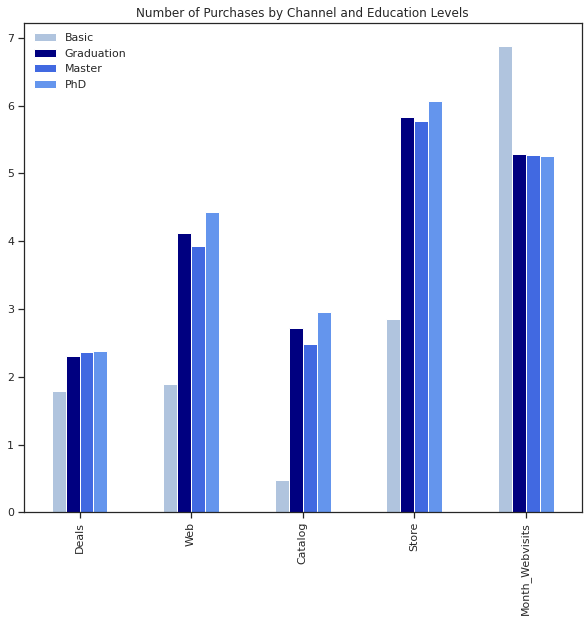

In [44]:
Numperson_df.plot(kind = 'bar', color = ['lightsteelblue', 'navy', 'royalblue', 'cornflowerblue'], 
                                 figsize = (10, 9), title = 'Number of Purchases by Channel and Education Levels');

A: Even though basic education level shows the lowest number of purchases in every sales channel, customers from basic education shows the highest number of monthly web visits.

## 2.2 Numerical Data

### Correlation between Numeric columns

Before starting EDA, we wanted to check which numeric columns are correlated with the target variable.

Text(0.5, 1.0, 'Correlation between Columns')

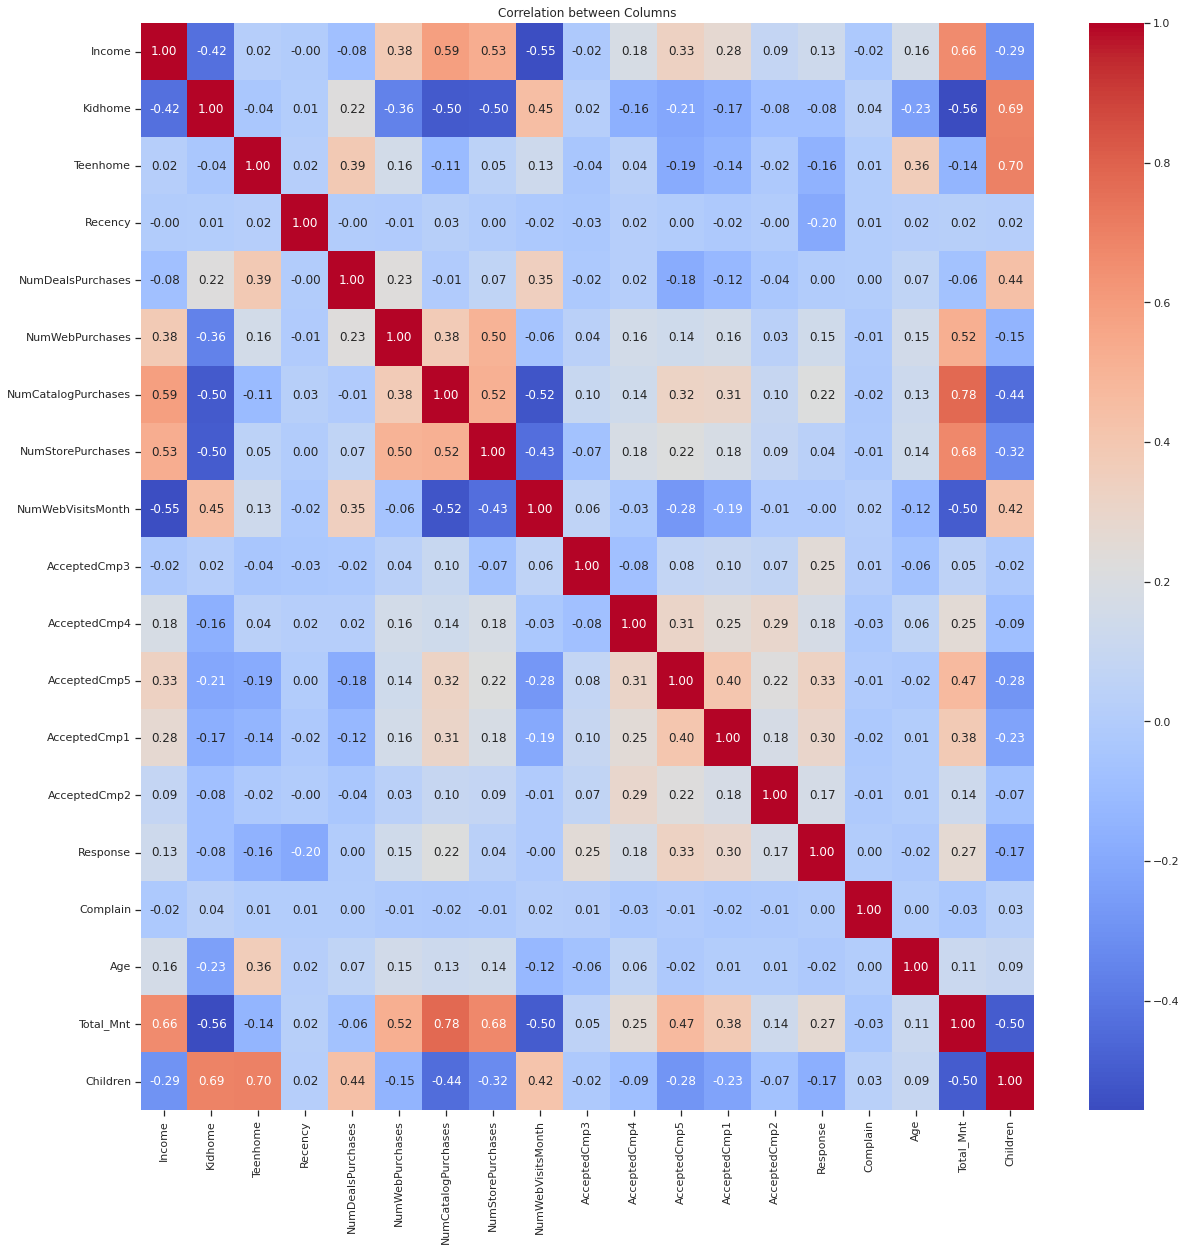

In [45]:
df_short = df.drop(["ID", "Year_Birth", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"], axis=1)

plt.figure(figsize=(20,20))
sns.heatmap(df_short.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Columns")

As you can see in the correlation chart, the NumCatalogPurchases has the highest correlation, which is 0.78. Kidhome, on the other hand, showed the lowest correlation which is -0.56.

In the EDA stage, we analyzed columns in high correlation to low correlation order.

### Sales channels

Since NumCatalogPurchases has the highest correlation, we will start our EDA from Sales channels.

The company has 4 sales channles, and each channel might have different characteristics.

**Q1. The catalog might have the highest proportion out of the total number of purchases.**

0    33207
dtype: int64


Text(0.5, 1.0, 'Proportion of sales channels')

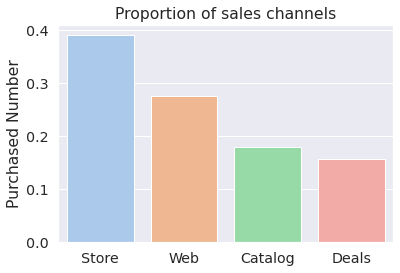

In [46]:
hl = df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis = 0).sort_values(ascending=False).to_frame()
sum = hl.sum()
print(sum)
hl = hl/sum
hl.columns = ['Purchased Number']
hl.rename(index=
{"NumDealsPurchases": "Deals",
"NumWebPurchases": "Web",
"NumCatalogPurchases": "Catalog",
"NumStorePurchases": "Store"},inplace = True)
sns.set(font_scale = 1.3)
sns.barplot(x = hl.index, y = 'Purchased Number', data = hl, palette="pastel").set(title="Sales Channel")
plt.title("Proportion of sales channels")

A: Even though online shopping is widely used recently, the store is still the most used sales channel. Deals, on the other hand is the least preferred channel.

**Q2. Do the higher number of web visits guarantee the higher number of purchases in Web?**

Text(0.5, 1.0, 'Relationship Between the Number of Visits to Company Web Site and Web Purchases')

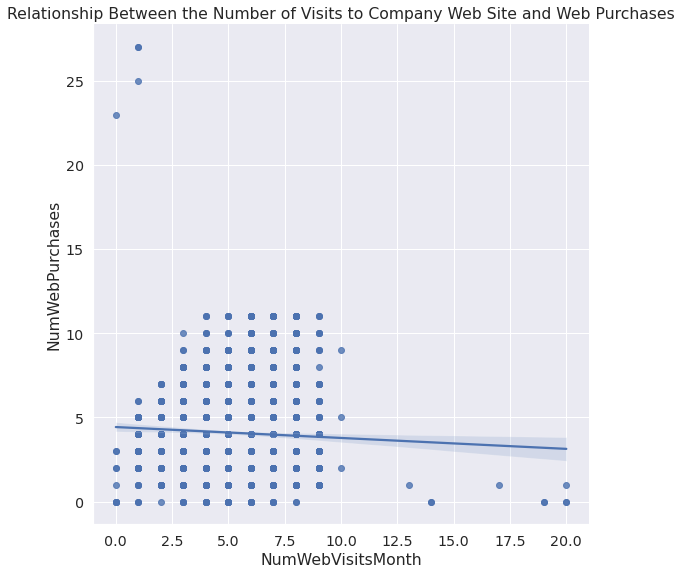

In [47]:
sns.lmplot(data=df, x="NumWebVisitsMonth", y="NumWebPurchases", height=8)
plt.title('Relationship Between the Number of Visits to Company Web Site and Web Purchases')

A: Our initial thought was the more a customer visits the company website, the more a customer buys via the web. But, as you can see in the scatter plot, there is a very weak negative relationship. (We assumed linear regression.)

Text(0.5, 1.0, 'Relationship Between the Number of Visits to Company Web Site and Deal Purchases')

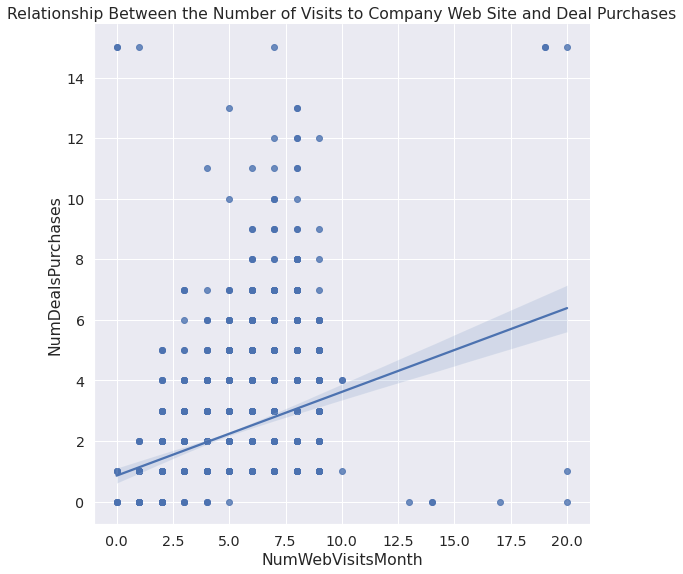

In [48]:
sns.lmplot(data=df, x="NumWebVisitsMonth", y="NumDealsPurchases", height=8)
plt.title('Relationship Between the Number of Visits to Company Web Site and Deal Purchases')

A: The number of visits to the company website, instead has a positive relationship with the number of deal purchases.

### Income

Then we analyzed the Income column which shows a 0.66 correlation.

**Q1. Do income and the total amount shows positive relationship?**

Text(0.5, 1.0, 'Relationship Between Income and Total Amount of Spending')

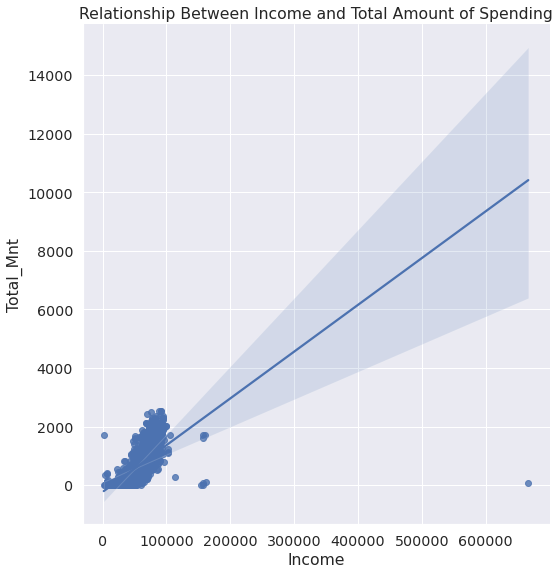

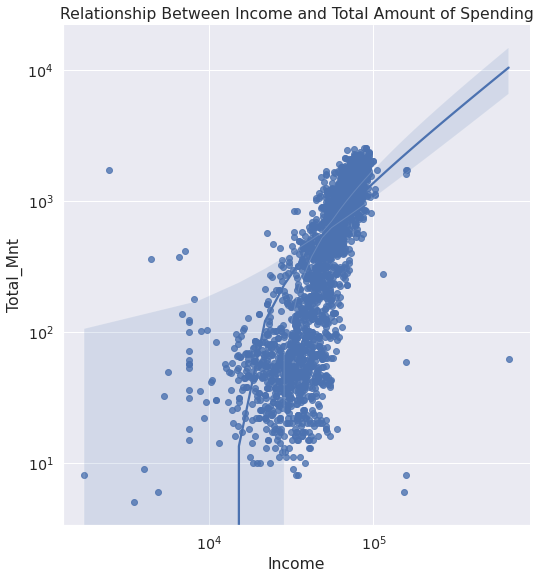

In [49]:
sns.lmplot(data=df, x="Income", y="Total_Mnt", height=8)
plt.title("Relationship Between Income and Total Amount of Spending")


sns.lmplot(data=df, x="Income", y="Total_Mnt", height=8)
plt.xscale('log')
plt.yscale('log')
plt.title("Relationship Between Income and Total Amount of Spending")

A: We first plotted the lmplot without scaling, but it was hard to see detailed relationship due to high density in certain area. So we tried switch the scale into log10. After taking log value, we could see the right-upward trend in income range between 10,000 and 100,000. Other than this area, relationship between income and total amount is almost random.

**Q2. Do customers in different income levels show different prefereces of specific product category?**

To answer this question we first divided income into three levels, low, medium, and high using 0-0.25, 0.25-0.75, 0.75+ quantiles.

In [50]:
lowinco = df[df['Income'] < df['Income'].quantile(0.25)]
midinco = df[(df['Income'] >= df['Income'].quantile(0.25)) & (df['Income'] <= df['Income'].quantile(0.75))]
hiinco = df[df['Income'] > df['Income'].quantile(0.75)]

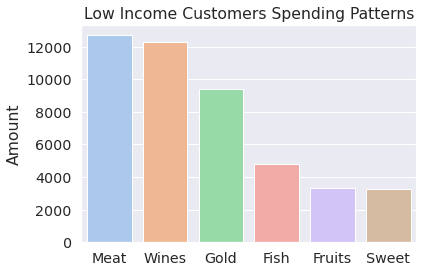

In [51]:
l = lowinco[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis = 0).sort_values(ascending=False).to_frame()
l.rename(index=
{"MntWines": "Wines",
"MntFruits": "Fruits",
"MntMeatProducts": "Meat",
"MntFishProducts": "Fish",
"MntSweetProducts": "Sweet",
"MntGoldProds": "Gold"},inplace = True)
l.columns = ['Amount']
sns.set(font_scale = 1.3)
sns.barplot(x = l.index, y = 'Amount', data = l, palette="pastel").set(title='Low Income Customers Spending Patterns');

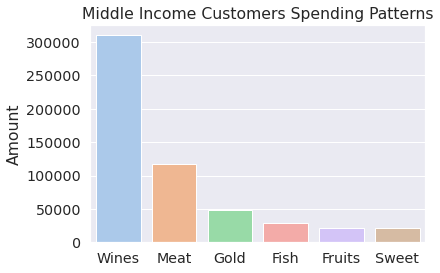

In [52]:
m = midinco[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis = 0).sort_values(ascending=False).to_frame()
m.rename(index=
{"MntWines": "Wines",
"MntFruits": "Fruits",
"MntMeatProducts": "Meat",
"MntFishProducts": "Fish",
"MntSweetProducts": "Sweet",
"MntGoldProds": "Gold"},inplace = True)
m.columns = ['Amount']
sns.barplot(x = m.index, y = 'Amount', data = m, palette="pastel").set(title='Middle Income Customers Spending Patterns');

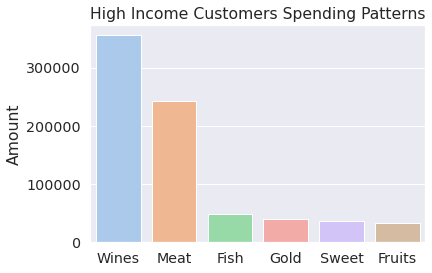

In [53]:
h = hiinco[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis = 0).sort_values(ascending=False).to_frame()
h.rename(index=
{"MntWines": "Wines",
"MntFruits": "Fruits",
"MntMeatProducts": "Meat",
"MntFishProducts": "Fish",
"MntSweetProducts": "Sweet",
"MntGoldProds": "Gold"},inplace = True)
h.columns = ['Amount']
sns.barplot(x = h.index, y = 'Amount', data = h, palette="pastel").set(title='High Income Customers Spending Patterns');

A: In all three income levels, Wines and Meat are the most popular product categories. Moreover, low-income level customers, unexpectedly, purchased a lot of gold products. The Gold product was the third popular product category at the low-income level. We assume this is because **the unit price** of a gold product is relatively high. Even if a customer purchases only one gold product, in term of amount of money a customer spent becomes high.

**Q3. Does preferred sales channel differ by the income level?**

In [54]:
ld = lowinco[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis = 0).tolist()
md = midinco[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis = 0).tolist()
hd = hiinco[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis = 0).tolist()
labels = ['Deals','Web','Catalog','Store']
colors = sns.color_palette('pastel')

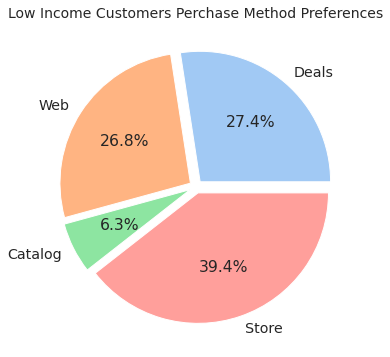

In [55]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=ld, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.6,colors=colors)
plt.title("Low Income Customers Perchase Method Preferences", fontsize=14);

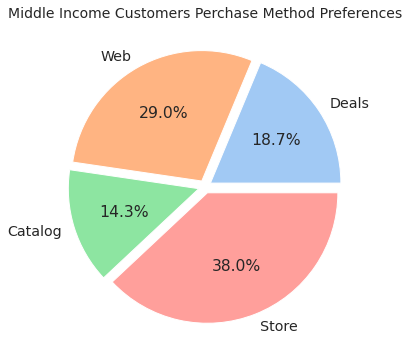

In [56]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=md, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.6,colors=colors)
plt.title("Middle Income Customers Perchase Method Preferences", fontsize=14);

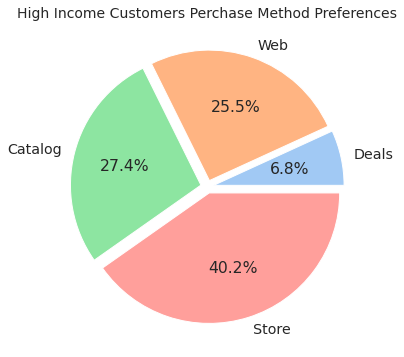

In [57]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=hd, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.6,colors=colors)
plt.title("High Income Customers Perchase Method Preferences", fontsize=14);

A: We broke down the number of purchases by sales channels. As we expected the low-income level showed a high proportion in purchases from Deals compared to other income levels.

**Q4. Which income level shows the highest campaign effects?**

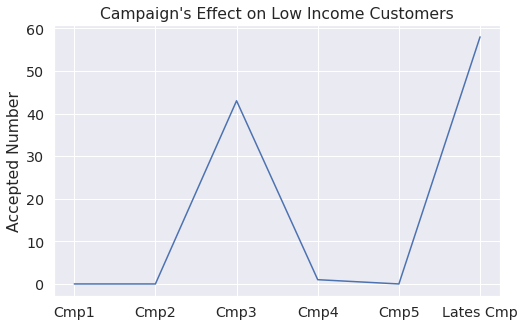

In [58]:
cl = lowinco[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'Response']].sum(axis = 0).to_frame()
cl.rename(index=
{"AcceptedCmp3": "Cmp3",
"AcceptedCmp4": "Cmp4",
"AcceptedCmp5": "Cmp5",
"AcceptedCmp1": "Cmp1",
"AcceptedCmp2": "Cmp2",
 "Response" : "Lates Cmp"},inplace = True)
cl.columns = ['Accepted Number']

plt.figure(figsize=(8,5))
sns.set(font_scale = 1.3)
sns.lineplot(x = cl.index, y = 'Accepted Number', data = cl, palette="pastel").set(title="Campaign's Effect on Low Income Customers");

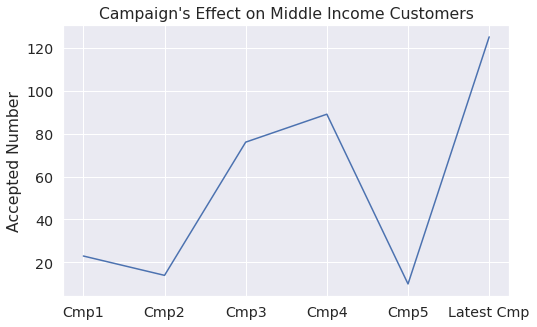

In [59]:
ml = midinco[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'Response']].sum(axis = 0).to_frame()
ml.rename(index=
{"AcceptedCmp3": "Cmp3",
"AcceptedCmp4": "Cmp4",
"AcceptedCmp5": "Cmp5",
"AcceptedCmp1": "Cmp1",
"AcceptedCmp2": "Cmp2",
 "Response": "Latest Cmp"},inplace = True)
ml.columns = ['Accepted Number']

plt.figure(figsize=(8,5))
sns.set(font_scale = 1.3)
sns.lineplot(x = ml.index, y = 'Accepted Number', data = ml, palette="pastel").set(title="Campaign's Effect on Middle Income Customers");

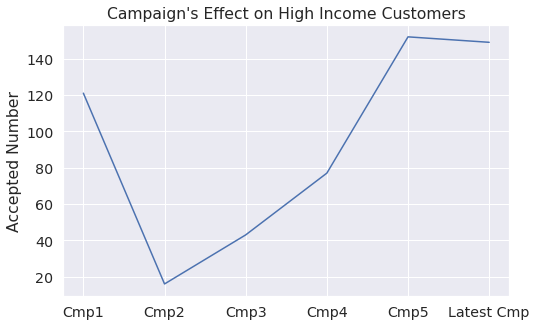

In [60]:
hl = hiinco[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'Response']].sum(axis = 0).to_frame()
hl.rename(index=
{"AcceptedCmp3": "Cmp3",
"AcceptedCmp4": "Cmp4",
"AcceptedCmp5": "Cmp5",
"AcceptedCmp1": "Cmp1",
"AcceptedCmp2": "Cmp2",
 "Response" : "Latest Cmp"},inplace = True)
hl.columns = ['Accepted Number']

plt.figure(figsize=(8,5))
sns.set(font_scale = 1.3)
sns.lineplot(x = hl.index, y = 'Accepted Number', data = hl, palette="pastel").set(title="Campaign's Effect on High Income Customers");

A: Companies usually offer discounts or giveaways as part of marketing campaigns. We expected the low-income customer would be more sensitive to campaigns and purchase via campaigns. The data, however, shows that more customers in the high-income accepted marketing campaigns and made purchases.

### Family (Kid, Teen and Marital Status)

The number of kids has a correlation of -0.56. We analyzed Kidhome and Teenhome together because these columns are related to the number of family member.

**Q1. Kid and teen are children of a customer. Would the total amount of spending vary by the number of children?**

Text(0.5, 1.0, 'Average Total Amount of Spending by the Number of Kid')

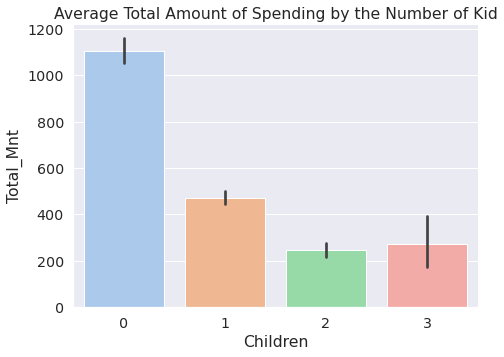

In [61]:
sns.catplot(x='Children',y='Total_Mnt',kind='bar',data=df,height=5.0,aspect=1.4, palette="pastel") 
plt.title("Average Total Amount of Spending by the Number of Kid")

In [62]:
df.groupby("Children")["Total_Mnt"].describe()

,count,mean,std,min,25%,50%,75%,max
Children,,,,,,,,
0,636.0,1104.616352,645.306222,6.0,625.75,1188.5,1590.25,2525.0
1,1124.0,472.679715,478.108598,5.0,63.00,305.0,802.75,2194.0
2,421.0,245.947743,311.328287,9.0,45.00,93.0,316.00,1750.0
3,53.0,274.603774,414.277051,8.0,35.00,88.0,348.00,1616.0


A: We expected that as the number of children increases the average value of the total amount would also increase. However, the bar chart and the table show that customers who do not have any children spend the most. The difference between the customer who don't have children and the rest of the customers was extremely big. As you can see from the table, The median of the total amount spent from 0 Children is about 3 times higher than customers who have 1 children. We thought that customers might prefer different product categories so it could affect the total amount. For example, customers who have children might purchase fruits and sweets rather than gold or wine. So we will break downn the amount into product category level to gain further insights in our next question.

**Q2. In terms of average amount spent on each product categories, the popular category differ by the number of children customers have?**

In [63]:
child_category = df.groupby("Children").agg({"MntWines":"mean", "MntFruits":"mean", "MntMeatProducts":"mean", "MntFishProducts":"mean", "MntSweetProducts":"mean", "MntGoldProds":"mean", "Total_Mnt":"mean"}).reset_index()
child_category.set_index("Children", inplace=True)

child_category

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Mnt
Children,,,,,,,
0,486.990566,52.295597,372.187107,76.338050,53.026730,63.778302,1104.616352
1,266.806050,19.409253,98.643238,26.684164,20.312278,40.824733,472.679715
2,141.591449,7.878860,51.299287,11.387173,8.370546,25.420428,245.947743
3,171.377358,6.905660,64.018868,7.075472,6.622642,18.603774,274.603774


A: As you can see from the table above, Customers who do not have any children tend to spend more on every product cateogires, especially on Wines and Meat. Customers with no children spent almost two times more than customers having 1 child. When you see the Meat product, the difference is even bigger. Customers with no children spent about 370, the rest of customers, on the other hand spent less than 100 on meat products.

**Q3. What about mariatl status? Overall distribution of Total amount varies by mariatl status?**

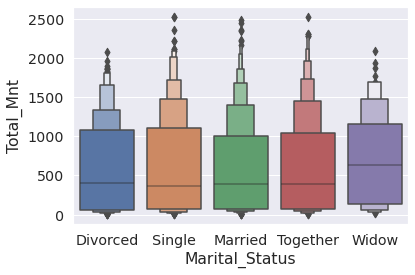

In [64]:
sns.boxenplot(data=df, x="Marital_Status", y="Total_Mnt")

In [65]:
df.groupby("Marital_Status")["Total_Mnt"].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Divorced,231.0,612.991342,580.771413,6.0,60.5,400.0,1075.00,2074.0
Married,864.0,590.802083,590.652817,8.0,68.0,396.5,1001.00,2486.0
Single,484.0,605.051653,626.694456,5.0,71.0,368.5,1100.25,2525.0
Together,578.0,605.775087,608.563409,8.0,69.0,386.0,1038.75,2524.0
Widow,77.0,738.818182,580.955559,15.0,138.0,636.0,1156.00,2088.0


A: As you can see from the enhanced box plot, all marital status show pretty similar range between 25 to 75 percentile. But Single, Married, and Together status have more dispersed value in Total Amount.

**Q4. Even among customers having no children, the average total amount could difer by Marital status. If it does, how big is the difference?**

In [66]:
no_child = df[df["Children"] == 0]
no_child = pd.pivot_table(data=no_child, index="Marital_Status", values=["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "Total_Mnt"], aggfunc=np.mean)
no_child.reset_index(inplace=True)

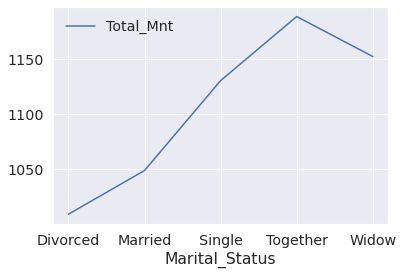

In [67]:
no_child.plot(kind='line',x="Marital_Status",y='Total_Mnt')

A: The line plot indicates that customers in "Together" relationship spent the most, around 1180, among customers having no children. The Divorced, on the other hand, spent the least, about 1000.  

### Marketing Campaigns


**Note:**
As mentioned in Data preparation part, we had to develop the logic to interpret columns related to campaigns because the source of this data does not provide information about campaigns. We assumed that each campaigns were held **independently**, conveying different messages each time so the order of campaign would not affect the acceptance rate.

**Q1. How is the campaign success rate for each campaign?**

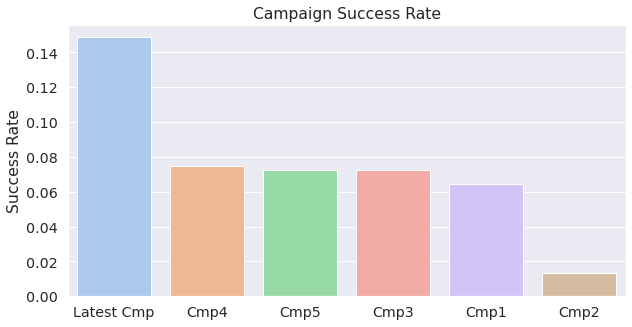

In [68]:
hl = df[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2', 'Response']].sum(axis = 0).sort_values(ascending=False).to_frame()
hl = hl/len(df['AcceptedCmp3'])
hl.rename(index=
{"AcceptedCmp3": "Cmp3",
"AcceptedCmp4": "Cmp4",
"AcceptedCmp5": "Cmp5",
"AcceptedCmp1": "Cmp1",
"AcceptedCmp2": "Cmp2",
 "Response": "Latest Cmp"},inplace = True)
hl.columns = ['Success Rate']

plt.figure(figsize=(10,5))
sns.set(font_scale = 1.3)
sns.barplot(x = hl.index, y = 'Success Rate', data = hl, palette="pastel").set(title="Campaign Success Rate");

A: The most successful campaign was the lates campaign. Campaign 1, 3, 4, and 5 showed similar success rate. But campaign 2 had very low success rate.

**Q2. How was acceptance rate for the latest campaign? Does it vary by education level or marital status?**

In [69]:
camp_edu = df.groupby("Education").agg({"Response":["sum", "count"]})
camp_edu["Response", "ratio"] = camp_edu["Response", "sum"] / camp_edu["Response", "count"]
camp_edu

Response                
                sum count     ratio
Education                          
Basic             2    54  0.037037
Graduation      151  1126  0.134103
Master           78   570  0.136842
PhD             101   484  0.208678

A: The customers with higher education level more frequently accept the marketing campaigns and purchase from them.

In [70]:
camp_mar = df.groupby("Marital_Status").agg({"Response":["sum", "count"]})
camp_mar["Response", "ratio"] = camp_mar["Response", "sum"] / camp_mar["Response", "count"]
camp_mar

Response                
                    sum count     ratio
Marital_Status                         
Divorced             48   231  0.207792
Married              98   864  0.113426
Single              108   484  0.223140
Together             59   578  0.102076
Widow                19    77  0.246753

A: When it comes to marrital status, there were big difference between Married + Together and Divorced + Single + Widow.

## 3. Average Customer Persona and Machine Learning

### Average Customer Persona and Inference

We found these characteristics of our customers by EDA.

1. About 50% of the sale comes form Spain and 50% of the customer are from Spain.
2. 95% of the cumstomers have at least Bacherlor degree, therefore, the company's customers are highly educated.
3. Almost 50% of the customers have no kid.
4. 80% of the customer have income that ranges from 25k to 80k.

Here is profile of company's average customer persona. 

In [71]:
df_demo_n = df[["Age", "Income", "Kidhome", "Teenhome"]]
df_demo_n = df_demo_n.mean()
df_demo_n = df_demo_n.round().to_frame()

In [72]:
df_demo_c = df[["Marital_Status", "Education", "Country"]].mode().transpose()

In [73]:
persona = pd.concat([df_demo_n, df_demo_c])
persona

,0
Age,51
Income,52220
Kidhome,0
Teenhome,1
Marital_Status,Married
Education,Graduation
Country,SP


According to these demographic information, the average customer would...



*   Most likely to purchase at the store
*   Prefer Wines and Meat (About 78% of their total spending)
*   Not really use Deals and Catalog

### Build regression Model and Predict Total amount spending of Average Persona

We built two models to explain relationship between customer characteristics and price and to make a prediction of total amount spending. We used linear regression and random forest regressor.

**Data preparation for the Machine Learning**

In [74]:
X = df[["Age","Income","Marital_Status","Country","Kidhome","Teenhome","Education"]]
X = pd.get_dummies(X,columns=['Education','Marital_Status','Country'], drop_first=True)
y = df['Total_Mnt']

In [75]:
X.columns

Index(['Age', 'Income', 'Kidhome', 'Teenhome', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Country_CA', 'Country_GER', 'Country_IND',
       'Country_SA', 'Country_SP', 'Country_US'],
      dtype='object')

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

**Initiate Linear Regression Model and Fit the Train data**

In [78]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Initiate Random Forest Model and Fit the Train Data**

In [79]:
rfr = RandomForestRegressor(n_estimators=100, random_state=3, criterion="mse")

In [80]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=3, verbose=0, warm_start=False)

**Make predictions using test data and evaluate the Linear Regression model**

In [81]:
prediction1 = linreg.predict(X_test)

In [82]:
r2_score(y_test, prediction1)

0.5876266330480739

In [83]:
np.sqrt(mean_squared_error(y_test, prediction1))

389.590586304177

**Make predictions using test data and evaluate the Random Forest model**

In [84]:
prediction2 = rfr.predict(X_test)

In [85]:
r2_score(y_test, prediction2)

0.7095994825725565

In [86]:
np.sqrt(mean_squared_error(y_test, prediction2))

326.93532114072497

These are the key performance index from our models.



*   Linear Regression
  * R^2:0.587626
  * RMSE: 389.59
*   Random Forest
  * R^2: 0.709599
  * RMSE:326.93


As you can see in terms of both R^2 and MSE. Therefore, we will make a prediction using Random Forest. Moreover, we will explain relationship between customer characteristics and price using coefficients we got from linear regression, because random forest model is one of black box model.


**Predict total amount of spending of average customer persona**

In [87]:
persona_ml = persona.transpose()

In [88]:
persona_ml = pd.get_dummies(persona_ml,columns=['Education','Marital_Status','Country'])

In [89]:
persona_ml["Education_Master"] =0
persona_ml["Education_PhD"] = 0
persona_ml["Marital_Status_Married"] = 0
persona_ml["Marital_Status_Single"] = 0
persona_ml["Marital_Status_Together"] = 0
persona_ml["Marital_Status_Widow"] = 0
persona_ml["Country_CA"] = 0
persona_ml["Country_GER"] = 0
persona_ml["Country_IND"] = 0
persona_ml["Country_SA"] = 0
persona_ml["Country_US"] = 0

persona_ml[['Age', 'Income', 'Kidhome', 'Teenhome', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Country_CA', 'Country_GER', 'Country_IND',
       'Country_SA', 'Country_SP', 'Country_US']]

,Age,Income,Kidhome,Teenhome,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Country_CA,Country_GER,Country_IND,Country_SA,Country_SP,Country_US
0,51,52220,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0


In [90]:
persona_predict = rfr.predict(persona_ml)

In [91]:
persona_predict

array([591.31])

Our average customer persona is expected to spend about 591.31 total.

**Understand relathionship between customer characteristics and total amount**

In [92]:
coef = linreg.coef_
feature_name = X.columns

coef.shape

coef_df = pd.DataFrame(coef, columns=["coefficient"])
coef_df["feature"] = feature_name
coef_df = coef_df[["feature", "coefficient"]]

coef_df

,feature,coefficient
0,Age,0.977497
1,Income,0.010833
2,Kidhome,-407.182176
3,Teenhome,-194.041102
4,Education_Graduation,201.818878
5,Education_Master,175.408236
6,Education_PhD,192.811455
7,Marital_Status_Married,17.065710
8,Marital_Status_Single,4.414416
9,Marital_Status_Together,-9.499684


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   feature      17 non-null     object 
 1   coefficient  17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 400.0+ bytes


Text(0.5, 1.0, 'Coefficient of each feature')

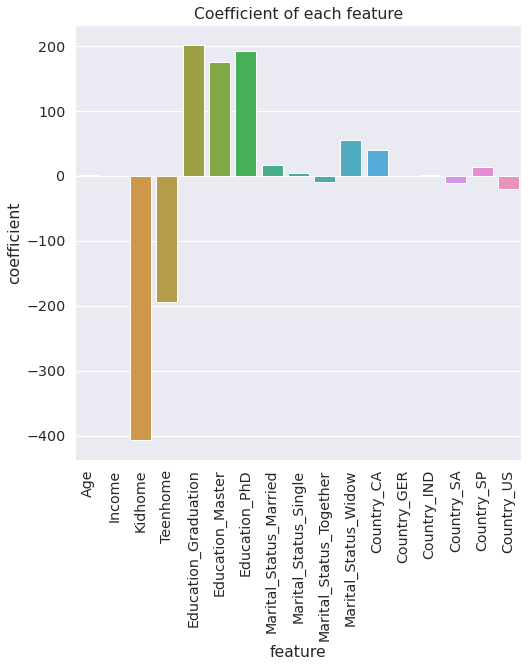

In [93]:
coef_df.info()
plt.figure(figsize=(8,8))
sns.barplot(x=coef_df['feature'],y=coef_df['coefficient'],data=coef_df,)
plt.xticks(rotation='vertical')
plt.title("Coefficient of each feature")

These are the coefficients that we got from the linear regression model.

The education_graducation has the strongest positive association with the total amount. Kidhome, on the other hand, has the strongest negative association.

We also found it interesting that income actually does not have that much relationship with the total amount. This was surprising because income is a key factor to construct a budget.

## Conclusion

Throughout the project, we explore customer data and found these insights.


* Customers from India tend to spend less than customers from other countries
* Customers who only finished basic education spend a significantly low amount
* Among high education level, customers with Ph.D. degree spend the most, followed by Graduation and Master
* Considering the size of family, customers who do not have any children spend the most compared to other customers
* Regarding marital status, the married customers are likely to spend less than others on average
* The wine and meat are the most popular product categories in terms of amount spent regardless of income and education
* Store is traditional but strong channel across all countries, education levels, and income levels
* The number of visiting the company's website has a positive relationship with the number of deal purchases
* The average customer would be 51 old, married, having 1 teen at home, having a bachelor's degree, and living in Spain
* Whether or not a customer is a graduation education level is the strongest positive factor to predict the total amount.

Based on these patterns and average customer persona, we suggest the company implement following action items to boost their revenue.


1. Use wine to attract more customers. Wine seems to be a popular category throughout most customer types. The company can put more attention on boosting its wine sales. For example, the company can expand the wine area at store, stock more wine brands that cover from low-end all the way to high-end to attract customers from all income level. Moreover, move wine selling area to the most conspicuous place at the store if possible, add more mobile shelf that contains bar snacks, sign a long term contract with wine suppliers to lower cost.

2. Reconsider using Deals. Deals take the lowest proportion out of the total number of purchases. This means the products chosen for deals are not attractive. The company also should promote deal purchase on the web to increase deal purchase because deal purchase has a positive linear relationship with the number of web visits.

3. Open more brick and mortar stores, upgrade supporting facilities, improve employees' working competence through training. Since customers with different characteristics all prefer to shop from stores. The company wants to improve their store shopping experience to outstrip its competitors.

4. Conduct marketing campaigns similar to the latest one. Due to the lack  of data, we can't explain why the latest campaign work so well. However, we can say that the latest campaign is effective since its acceptance rate doubled compared to the previous campaigns. The company definitely doesn't want to change anything for their next campaign and needs to start collecting more detailed campaign data to help analyze the key elements of an effective campaign.
